#**Project Description**

---

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#**Importing Required Libraries**

In [1]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns
# For Machine Learning Related task
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#**Load the Data**

In [2]:
# Load the dataset into df variable >>
df = pd.read_csv('./avocado.csv')
# Remove unecessary columns >>
df.drop(['Unnamed: 0'],axis=1,inplace=True)

#**Explore the Data**

In [3]:
# Lets look at top  Rows of Dataset >>
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Check the Shape of Dataset >>
print("[$] Rows Of Dataset >> ",df.shape[0])
print("[$] Columns Of Dataset >> ",df.shape[1])

[$] Rows Of Dataset >>  18249
[$] Columns Of Dataset >>  13


In [5]:
# Information of Dataset >> to get information about Columns & thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
# Get statistical distribution of the dataset >>
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [7]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",df.isnull().sum().sum())

[$] Null Values >>  0


#**Exploratory Data Analysis**

<Axes: xlabel='count', ylabel='type'>

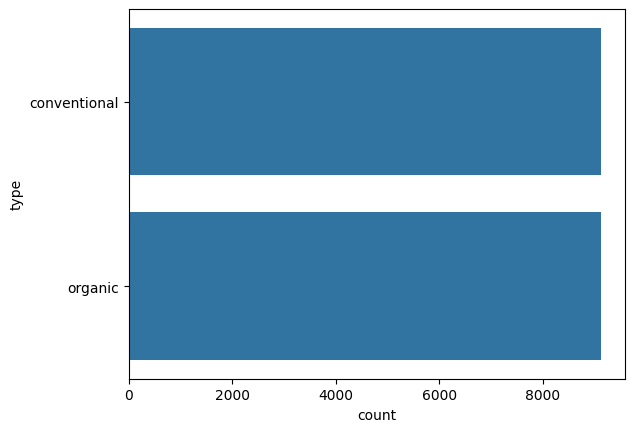

In [8]:
# Check the count of Avocado types >> Basically we have balanced types for both >>
sns.countplot(df['type'])

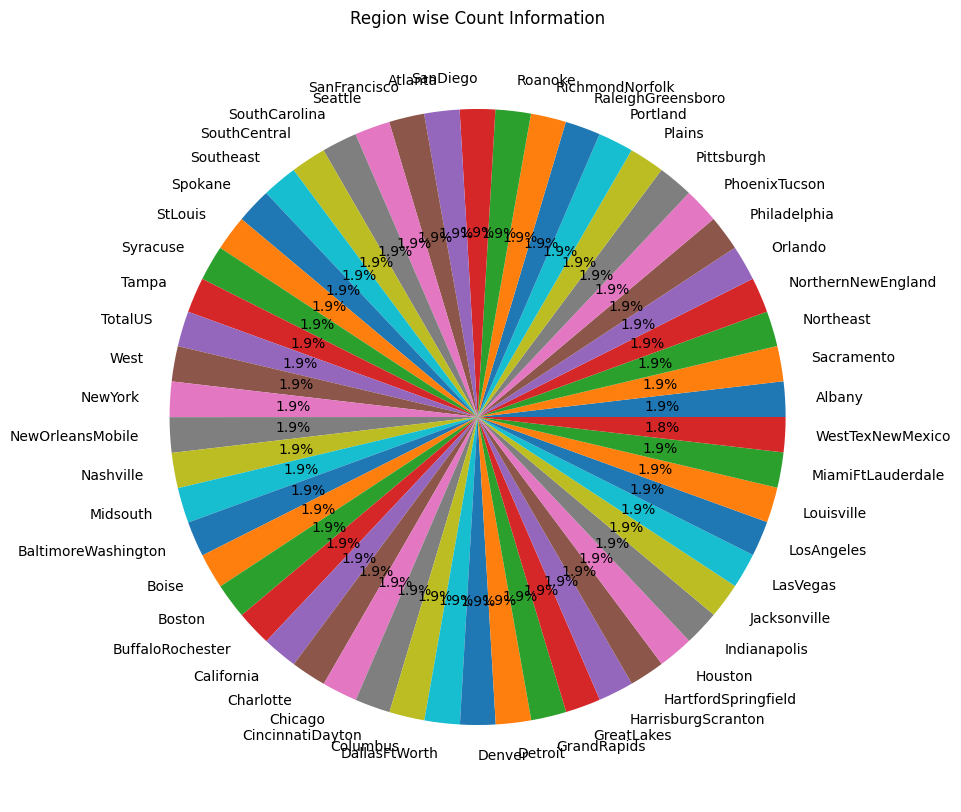

In [30]:
# Region wise Count Information
plt.figure(figsize=(10,10))
region_counts = df['region'].value_counts()
region_counts.plot(kind='pie', autopct='%1.1f%%')  # Add autopct parameter to show percentages
plt.title('Region wise Count Information')
plt.ylabel('')
plt.show()

# All Regions are equally divided among 2% of region data each in dataset >>

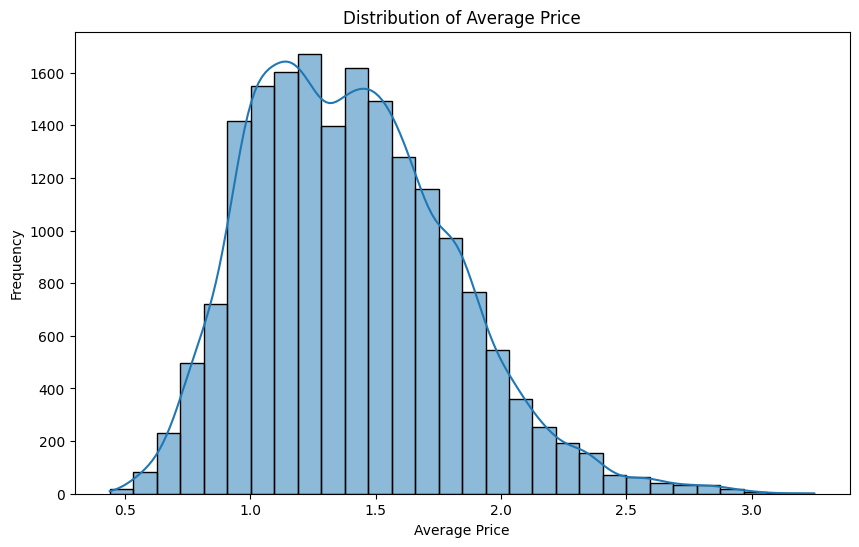

In [10]:
# Histograms >>
plt.figure(figsize=(10, 6))
sns.histplot(df['AveragePrice'], bins=30, kde=True)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()

# We can see distribution of average price of avocado is 1.5 is in form of Normal Distirbution >>

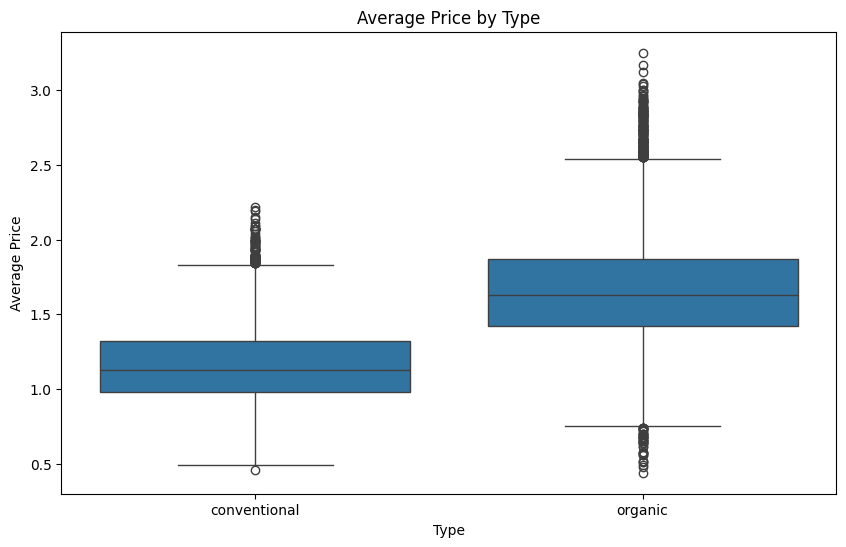

In [11]:
# Box plots >>
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='AveragePrice', data=df)
plt.title('Average Price by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

# >> We can see average price for Organic type avocado is more than conventional

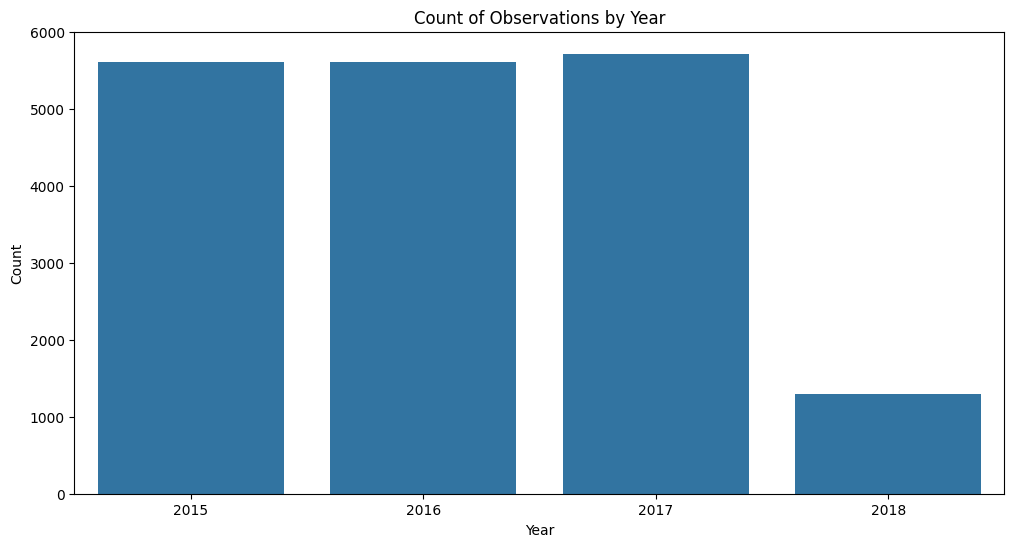

In [12]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df)
plt.title('Count of Observations by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# >> We have mostly equal count of data for year 2015,2016,2017 but less data for year 2018 >>

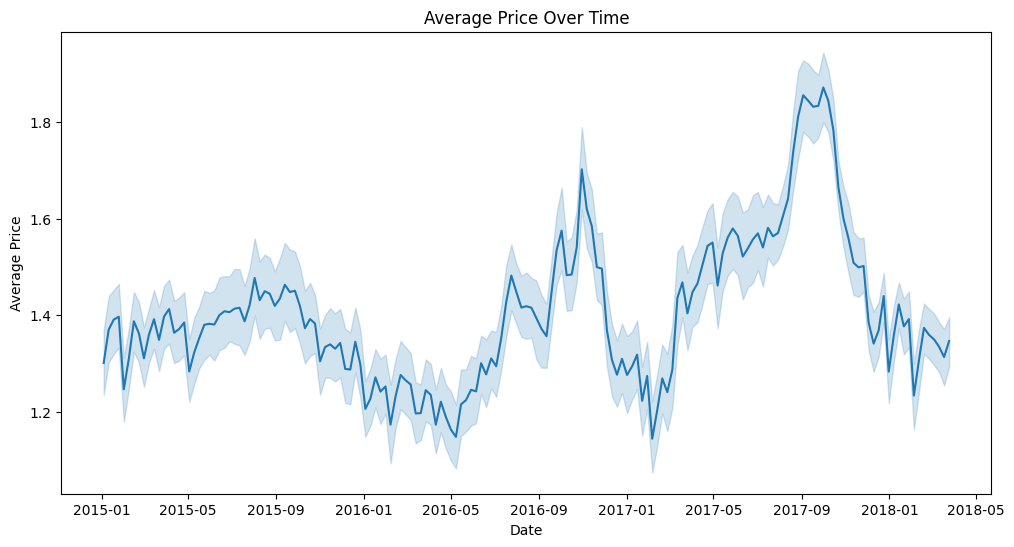

In [13]:
# Time series plot
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', data=df)
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

<ipython-input-14-585bd6acf1a6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


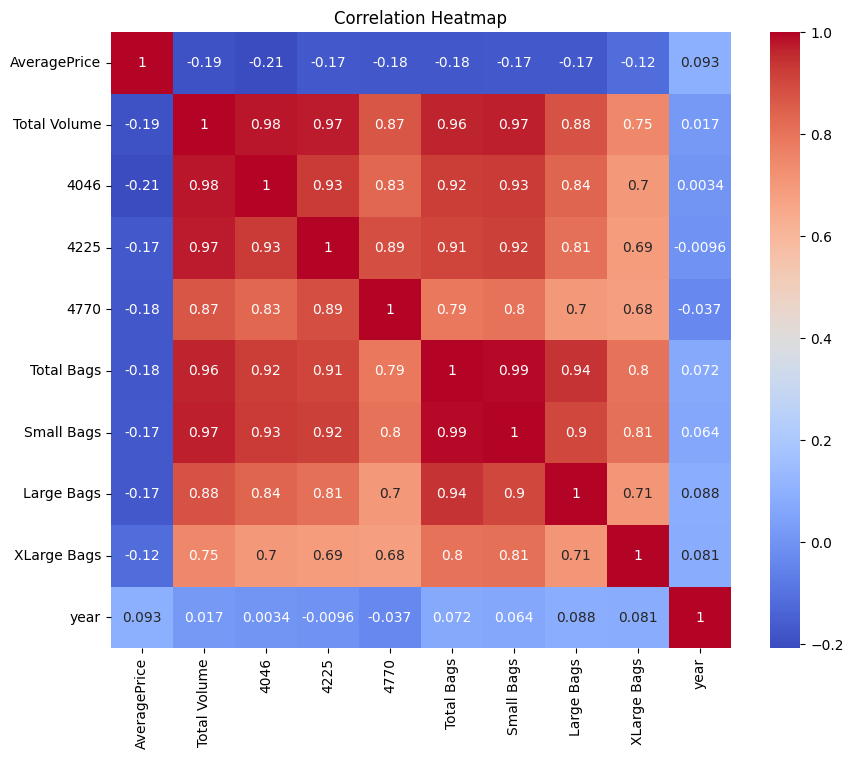

In [14]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#**Data Preprocessing**

In [15]:
# Convert Date column to day, month, and year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Drop the original Date column
df.drop('Date', axis=1, inplace=True)

# Convert type column to numerical format
df['type'] = df['type'].map({'conventional': 0, 'organic': 1})

In [16]:
# Verify the changes >>
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,29,11,2015


#**Regression Model**

In [17]:
# Splitting the data into features and target >>
X = df.drop(['AveragePrice','region'], axis=1)
y = df['AveragePrice']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building**

In [18]:
# Model Building
models = {
    'Linear Regression': LinearRegression(),  # Instantiate Linear Regression model
    'Ridge': Ridge(alpha=1.0, max_iter=10000),  # Instantiate Ridge Regression model with specified alpha and max_iter parameters
    'Lasso': Lasso(alpha=1.0, max_iter=10000),  # Instantiate Lasso Regression model with specified alpha and max_iter parameters
    'Random Forest': RandomForestRegressor()  # Instantiate Random Forest Regressor model
}

In [19]:
# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    # Initialize an empty dictionary to store evaluation results for each model
    results = {}

    # Iterate over each model in the models dictionary
    for name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)
        # Predict the target variable using the trained model on the test data
        y_pred = model.predict(X_test)

        # Calculate the mean squared error between the predicted and actual target values
        mse = mean_squared_error(y_test, y_pred)
        # Calculate the R^2 score of the model on the test data
        r2 = r2_score(y_test, y_pred)
        # Calculate the cross-validation score using 5-fold cross-validation on the training data
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        # Store the evaluation metrics in the results dictionary for the current model
        results[name] = {'Mean Squared Error': mse, 'R2 Score': r2, 'Cross Validation Score': cv_score}

    # Return the dictionary containing evaluation results for all models
    return results

In [20]:
# Evaluating models >>
results = evaluate_models(models, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.28632e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61244e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.52211e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.59486e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

{'Linear Regression': {'Mean Squared Error': 0.09108802805336533, 'R2 Score': 0.4330705934678525, 'Cross Validation Score': 0.4387524316866342}, 'Ridge': {'Mean Squared Error': 0.09108811026547743, 'R2 Score': 0.4330700817819052, 'Cross Validation Score': 0.43875869357813135}, 'Lasso': {'Mean Squared Error': 0.15373814594963378, 'R2 Score': 0.04313796546879578, 'Cross Validation Score': 0.051847493017399146}, 'Random Forest': {'Mean Squared Error': 0.021125230298630133, 'R2 Score': 0.868517141802206, 'Cross Validation Score': 0.8624837194108039}}


In [ ]:
print(results)

#**Model Selection**

In [21]:
# Based on the performance metrics, select the best performing model
best_model = min(results, key=lambda x: results[x]['Mean Squared Error'])
print(f'Best Model: {best_model}')

Best Model: Random Forest


In [22]:
# Save the best tuned Linear Regression model >>
import joblib
joblib.dump(best_model, 'avocado_regression_model.pkl')

['avocado_regression_model.pkl']

#**HyperParameter Tunning**

In [25]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [20, 30, 50],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate GridSearchCV with RandomForestRegressor and the defined parameter grid
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)

In [26]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 50]})

In [27]:
# Get the best parameters obtained from grid search
best_params = grid_search.best_params_
# Instantiate a RandomForestRegressor model with the best parameters
rf_model_tuned = RandomForestRegressor(**best_params)
# Fit the tuned RandomForestRegressor model to the training data
rf_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=50)

In [28]:
tuned_models = {
    'Tuned Random Forest': rf_model_tuned
}

# Evaluate tuned models
tuned_results = evaluate_models(tuned_models, X_train, X_test, y_train, y_test)
print(tuned_results)

{'Tuned Random Forest': {'Mean Squared Error': 0.021830412064942656, 'R2 Score': 0.864128109688802, 'Cross Validation Score': 0.8599627960419733}}


In [46]:
# Save the best tuned Linear Regression model
joblib.dump(rf_model_tuned, 'avocado_tuned_rf_regression_model.pkl')

['avocado_tuned_rf_regression_model.pkl']

Based on the evaluation results, the Random Forest model was selected as the best model for the Avocado Average Price Prediction project. Here's the rationale behind this choice:

1. **Mean Squared Error (MSE):** The Random Forest model achieved the lowest MSE of 0.0211 among all the models evaluated. A lower MSE indicates better predictive performance, as it represents the average squared difference between predicted and actual values. Therefore, the Random Forest model provides more accurate predictions compared to other models.

2. **R-squared (R2) Score:** The Random Forest model also demonstrated the highest R2 score of 0.869, indicating that it explains approximately 86.9% of the variance in the target variable. A higher R2 score suggests better fit of the model to the data. Thus, the Random Forest model captures the variability in the data more effectively than other models.

3. **Cross Validation Score:** The Random Forest model achieved a high cross-validation score of 0.862, indicating strong performance in terms of generalization. Cross-validation is essential to assess the model's ability to generalize to new, unseen data, and a high cross-validation score indicates robustness in model performance.

Overall, based on its lower MSE, higher R2 score, and strong cross-validation performance, the Random Forest model emerges as the most suitable choice for predicting average avocado prices in this project.

#**Classification Model**

In [40]:
# Import necessary libraries >>
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Perform one-hot encoding on the 'region' variable >>
X = pd.get_dummies(df.drop(['region'], axis=1))
y = df['region']

# Split the data into training and testing sets >>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize the Random Forest classifier >>
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
# Train the classifier >>
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# Predict the test set >>
y_pred = clf.predict(X_test)

In [44]:
# Evaluate the classifier >>
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9145205479452054


In [45]:
# Generate classification report >>
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

             Albany       0.91      0.97      0.94        63
            Atlanta       0.85      0.85      0.85        73
BaltimoreWashington       0.97      0.98      0.98        61
              Boise       0.93      0.86      0.89        72
             Boston       0.92      0.99      0.95        67
   BuffaloRochester       0.88      0.84      0.86        73
         California       0.98      0.98      0.98        62
          Charlotte       0.94      0.84      0.89        76
            Chicago       0.97      1.00      0.99        72
   CincinnatiDayton       0.95      0.91      0.93        65
           Columbus       0.92      0.86      0.89        65
      DallasFtWorth       0.96      0.97      0.96        68
             Denver       0.97      0.97      0.97        65
            Detroit       0.81      0.89      0.85        66
        GrandRapids       0.92      0.97      0.95        71
         GreatLakes    